<a href="https://colab.research.google.com/github/javierber/projects-repo/blob/main/Recreate_Interest_vs_Principal_Graph_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK#1 Don't forget to mount your drive, import libraries, upload your data, and smile!!

TASK#2 1. Create a filter so the Mortgage Name is '30 Year'. TASK#3 Use the len() to find how many rows correspond to 30 years.

TASK#4 2. Create a filter for an interest rate of 3% (notice how it is written in the data!).  

TASK#5 3. Define a new dataframe based on both the year and the interest filters you have created.  

4. We have a choice for the 5% interest rate:

TASK#6 We can just create another filter where df.['Interest Rate'] == .05 

OR 

TASK#7 We can use the negate symbol (~) with our current filter to give us everything EXCEPT what we have defined in the filter. This works here because we only have two interest rates (any value that is NOT 3% is 5%)

TASK#8 5. Since we want to graph the cumulative sum of the interest paid, you can use the function .cumsum().  What are the first three values in the output for the cumulative sum of the 3% rate?

TASK#9 6. Use plt.plot(x, y, c=color) to plot the black line (5%).  We want the x values to be the ['Month'] and the y values to be the cumulative sum of the Interest Paid.  You can use the code from the previous question to define your y values within the plt.plot() function!  Hint: for black, c = 'k'

TASK#10 7. To get both lines on the same graph, just put two plt.plot() functions one after the other in same code block and run it!Submit your code and reproduced graph! Hint: for blue, c = 'b'

In [ ]:
# TASK#1 Don't forget to mount your drive, import libraries,
# upload your data, and smile!!

#Mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
#Load Data
filepath = '/content/drive/MyDrive/Colab Notebooks/mortgages.csv'
df = pd.read_csv(filepath, header = 0)
df.head()
df.set_index('Month')

,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
Month,,,,,,,
1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...
176,15619.91,3163.17,65.08,3098.09,12521.82,15 Year,0.05
177,12521.82,3163.17,52.17,3111.00,9410.82,15 Year,0.05
178,9410.82,3163.17,39.21,3123.96,6286.86,15 Year,0.05


In [ ]:
#Review/Clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [ ]:
df[df.isnull()].count()

Month               0
Starting Balance    0
Repayment           0
Interest Paid       0
Principal Paid      0
New Balance         0
Mortgage Name       0
Interest Rate       0
dtype: int64

In [32]:
#TASK#2 1. Create a filter so the Mortgage Name is '30 Year'.
rate30year = df['Mortgage Name'] == '30 Year'
rate30year.head()

0    True
1    True
2    True
3    True
4    True
Name: Mortgage Name, dtype: bool

In [37]:
#TASK3 - Use the len() to find how many rows correspond to 30 years.
len(df[rate30year])

720

In [53]:
#TASK#4 2. Create a filter for an interest rate of 3% 
#(notice how it is written in the data!).
ratefilter3 = df['Interest Rate'] == 0.03
ratefilter3



0        True
1        True
2        True
3        True
4        True
        ...  
1075    False
1076    False
1077    False
1078    False
1079    False
Name: Interest Rate, Length: 1080, dtype: bool

In [54]:
#TASK#5 3. Define a new dataframe based on both the year and the interest filters you have created.
rate30yr_3percent = df.loc[rate30year & ratefilter3, :]
rate30yr_3percent



,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
355,356,8364.12,1686.42,20.91,1665.51,6698.61,30 Year,0.03
356,357,6698.61,1686.42,16.74,1669.68,5028.93,30 Year,0.03
357,358,5028.93,1686.42,12.57,1673.85,3355.08,30 Year,0.03
358,359,3355.08,1686.42,8.38,1678.04,1677.04,30 Year,0.03


In [73]:
#We have a choice for the 5% interest rate:
ratefilter5 = df['Interest Rate'] == 0.05
rate30yr_5percent = df.loc[rate30year & ratefilter5, :]
rate30yr_5percent


,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05
...,...,...,...,...,...,...,...,...
715,356,10596.54,2147.29,44.15,2103.14,8493.40,30 Year,0.05
716,357,8493.40,2147.29,35.38,2111.91,6381.49,30 Year,0.05
717,358,6381.49,2147.29,26.58,2120.71,4260.78,30 Year,0.05
718,359,4260.78,2147.29,17.75,2129.54,2131.24,30 Year,0.05


In [74]:
#TASK#6 We can use the negate symbol (~) with our current filter to give us everything EXCEPT what we have defined in the filter. 
#This works here because we only have two interest rates (any value that is NOT 3% is 5%)
rate30yr_not3percent = (rate30year[~ratefilter3])
rate30yr_not3percent

360      True
361      True
362      True
363      True
364      True
        ...  
1075    False
1076    False
1077    False
1078    False
1079    False
Name: Mortgage Name, Length: 540, dtype: bool

In [75]:
#TASK#7 5. Since we want to graph the cumulative sum of the interest paid, you can use the function .cumsum(). 
#What are the first three values in the output for the cumulative sum of the 3% rate?
rate30yr_3percent['Interest Paid'].cumsum().head(3)

0    1000.00
1    1998.28
2    2994.84
Name: Interest Paid, dtype: float64

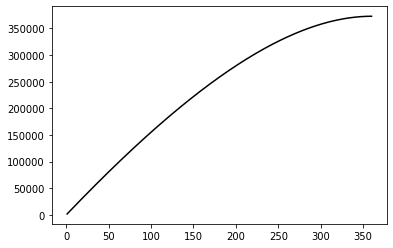

In [84]:
#TASK#8 6. Use plt.plot(x, y, c=color) to plot the black line (5%). We want the x values to be the ['Month'] and the y values to be 
#the cumulative sum of the Interest Paid. You can use the code from the previous question to define your y values within the plt.plot()
 #function! Hint: for black, c = 'k'
rate30yr_5percent['Interest Paid'].cumsum()
plt.plot(rate30yr_5percent['Month'], rate30yr_5percent['Interest Paid'].cumsum(), c = 'k')




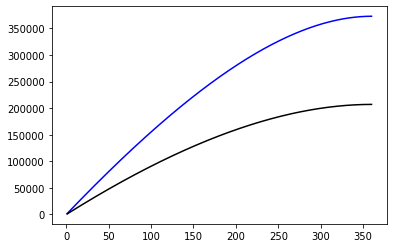

In [85]:
#TASK#9 7. To get both lines on the same graph, just put two plt.plot() functions one after the other in same code block and run it!
plt.plot(rate30yr_5percent['Month'], rate30yr_5percent['Interest Paid'].cumsum(), c='b')
plt.plot(rate30yr_3percent['Month'], rate30yr_3percent['Interest Paid'].cumsum(), c='k')
